In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
df = pd.read_csv('/Users/gg8kyd/Documents/london/ds/02/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df.shape

(568454, 10)

In [6]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
df["Sentiment"] = df["Score"].apply(lambda score:"positive" if score > 3 else "negative")
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [9]:
print(df['Sentiment'].value_counts())

positive    443777
negative    124677
Name: Sentiment, dtype: int64


In [10]:
df = df[["Score","Sentiment","Summary","Text"]]

In [11]:
df[df.Score == 5].head(10)

,Score,Sentiment,Summary,Text
0,5,positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
4,5,positive,Great taffy,Great taffy at a great price. There was a wid...
6,5,positive,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,5,positive,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,5,positive,Yay Barley,Right now I'm mostly just sprouting this so my...
9,5,positive,Healthy Dog Food,This is a very healthy dog food. Good for thei...
10,5,positive,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...
11,5,positive,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...
14,5,positive,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,5,positive,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...


In [12]:
df[df.Score == 1].head(10)

,Score,Sentiment,Summary,Text
1,1,negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,1,negative,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,1,negative,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,1,negative,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,1,negative,stale product.,Arrived in 6 days and were so stale i could no...
73,1,negative,Warning! WARNING! -ALCOHOL SUGARS!,Buyer Beware Please! This sweetener is not for...
75,1,negative,No Tea Flavor,No tea flavor at all. Just whole brunch of art...
99,1,negative,Bad,I fed this to my Golden Retriever and he hated...
153,1,negative,Rip off Price,These singles sell for $2.50 - $3.36 at the st...
164,1,negative,Tasteless but low calorie,Seriously this product was as tasteless as the...


In [13]:
from nltk.stem import SnowballStemmer
#stemmers remove morphological affixes from words, leaving only the word stem.
snow = SnowballStemmer('english')
print(snow.stem('tasty'))
print(snow.stem('joined'))
print(snow.stem('apples'))

tasti
join
appl


In [14]:
import re
#cleaning punctuations from the sentence
sentence = "I'd like to have some coffee today!"
sentence = re.sub(r'[\'|"\#]',r'', sentence) #remove these punctuation
sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r'', sentence) # replace these punctuation with space
sentence

'Id like to have some coffee today'

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.subplot.bottom']=.1

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=None,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()

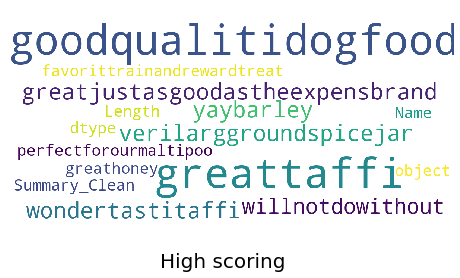

In [19]:
show_wordcloud(df.Summary_Clean.loc[df.Score == 5], title = "High scoring")

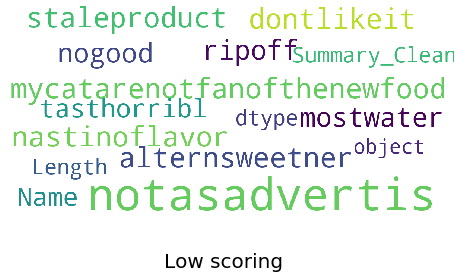

In [20]:
show_wordcloud(df.Summary_Clean.loc[df.Score == 1], title = "Low scoring")

In [21]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state = 1)
print("%d items in training data, %d in test data" % (len(train), len(test)))

454763 items in training data, 113691 in test data


In [22]:
train = train.reset_index(drop=True)
train.head()

,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,The best espresso i've ever had,"I've tried many types, but out of all of them,...",thebestespressoiveverhad
1,3,negative,"False advertising, but tasty",The only thing chipotle about this sauce is in...,falsadvertisbuttasti
2,1,negative,Deadly treat,I bought these at a local store. I broke up th...,deadtreat
3,3,negative,Too Strong,I ordered light roast coffee and was sent one ...,toostrong
4,4,positive,Very Good Tea,This tea is very good. A cup in the morning an...,verigoodtea


In [23]:
test = test.reset_index(drop=True)
test.head()

,Score,Sentiment,Summary,Text,Summary_Clean
0,5,positive,Cherry Pie Larabar,I love the Cherry Pie Lara bar. Best and tast...,cherripielarabar
1,5,positive,Melitta Coffee,Melitta Cafe COllection Blanc et Noir coffee h...,melittacoffe
2,5,positive,great treat,my girls absolutely loved this tuna. they were...,greattreat
3,5,positive,Daily Calming,The vendor is fast and dependable. The tea is ...,dailicalm
4,5,positive,Best Canned Artichokes Out There!,UPDATE - 8/9/2010<br />A lot can happen in jus...,bestcanartichokoutthere


In [24]:
# convert text to vector
# Uni-gram BOW
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
train['Summary_Clean'].values

array(['thebestespressoiveverhad', 'falsadvertisbuttasti', 'deadtreat',
       ..., 'bestwaffelmixever', 'triityoullloveit', 'notworththemoney'],
      dtype=object)

In [26]:
uni_gram = CountVectorizer(min_df = 5, binary = True)
uni_gram_vectors_train = uni_gram.fit_transform(train['Summary_Clean'].values)
uni_gram_vectors_test = uni_gram.fit_transform(test['Summary_Clean'].values)

In [27]:
uni_gram_vectors_train.shape

(454763, 14005)

In [28]:
uni_gram_vectors_train[0]

<1x14005 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [29]:
type(uni_gram_vectors_train)

scipy.sparse.csr.csr_matrix

In [30]:
# Bi-gram BOW
bi_gram = CountVectorizer(ngram_range = (1,2), min_df = 5, binary = True)
bi_gram_vectors_train = bi_gram.fit_transform(train['Summary_Clean'].values)
bi_gram_vectors_test = bi_gram.fit_transform(test['Summary_Clean'].values)

In [31]:
bi_gram_vectors_train.shape

(454763, 15059)

In [32]:
features = bi_gram.get_feature_names()
features[-20:]

['yummistuff',
 'yummitea',
 'yummitreat',
 'yummiyummi',
 'yummiyummiyummi',
 'yummiyumyum',
 'yummm',
 'yummmm',
 'yummmmm',
 'yummmmmi',
 'yummmmmm',
 'yummo',
 'yummy',
 'yummylittlqueensay',
 'yumyum',
 'yumyumyum',
 'zerostar',
 'zico',
 'zuke',
 'zukemininatur']

In [33]:
type(bi_gram_vectors_train)

scipy.sparse.csr.csr_matrix

In [34]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df = 5)
tfidf_vectors_train = tfidf.fit_transform(train['Summary_Clean'].values)
tfidf_vectors_test = tfidf.transform(test['Summary_Clean'].values)

In [35]:
tfidf_vectors_train.shape

(454763, 15059)

In [36]:
features = tfidf.get_feature_names()
features[0:10]

['0forbeefflavor',
 '10',
 '100',
 '100calori',
 '100caloricakest',
 '100caloripackchipahoycooki',
 '1073greatstuff',
 '10gramofproteinin90calori',
 '10star',
 '10thumbwayup']

In [37]:
prediction = dict()
prob = dict()